### Chargement et préparation des données

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data = pd.read_csv('../data/final/telecom_sales_data_final.csv')
data.head()

revenue_cols = ['jPhone_Pro_revenue', 'Kaggle_Pixel_5_revenue', 'Planet_SX_revenue']


In [74]:
bool_cols = data.select_dtypes(include='bool').columns.tolist()
data[bool_cols] = data[bool_cols].astype(int)

### Exploratory Data Analysis (EDA): Revenue Patterns

In [75]:
data[revenue_cols].describe()

,jPhone_Pro_revenue,Kaggle_Pixel_5_revenue,Planet_SX_revenue
count,17536.000000,17536.000000,17536.000000
mean,83046.149016,40244.038978,21621.910846
std,55098.709865,26043.795950,13772.595504
min,0.000000,1576.180000,1066.710000
25%,47520.925000,23072.357500,12767.720000
50%,70835.830000,33985.020000,18288.840000
75%,100716.447500,48998.450000,25955.000000
max,536859.730000,239736.500000,103250.710000


#### Commentaire des resultats :
| Modèle         | Revenu Moyen  | Écart-Type   | Quartiles                           | Revenu Minimum | Revenu Maximum |
|----------------|---------------|--------------|-------------------------------------|----------------|----------------|
| **jPhone Pro** | 83,046.15     | 55,098.71    | 25% : < 47,520.93<br> Médiane : 70,835.83<br> 25% : > 100,716.45 | 1,066.71        | 536,859.73     |
| **Kaggle Pixel 5** | 40,244.04     | 26,043.80    | 25% : < 23,072.36<br> Médiane : 33,985.02<br> 25% : > 48,998.45  | 1,576.18        | 239,736.50     |
| **Planet SX**  | 21,621.91     | 13,772.60    | 25% : < 12,767.72<br> Médiane : 18,288.84<br> 25% : > 25,955.00 | 1,066.71        | 103,250.71     |



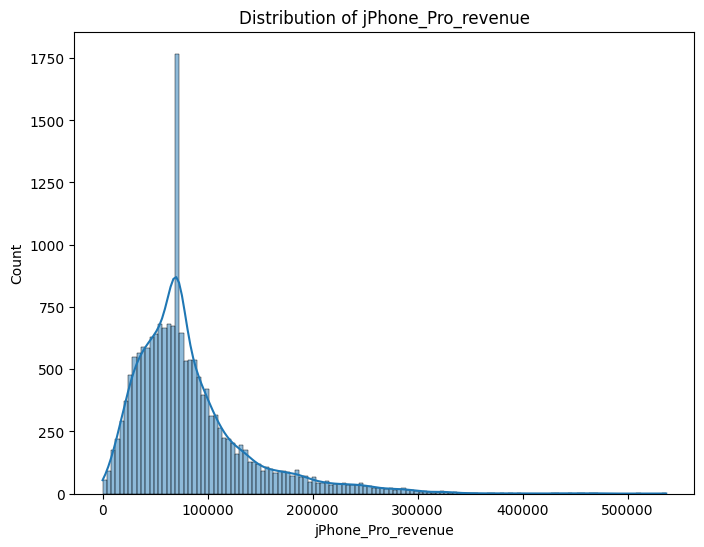

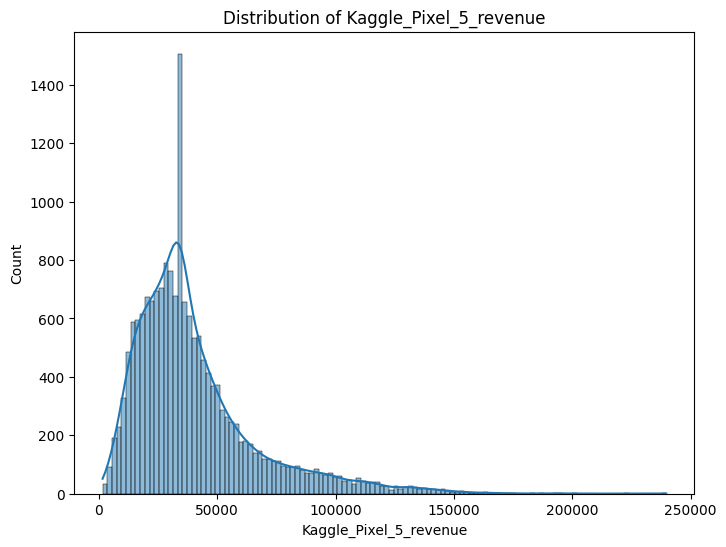

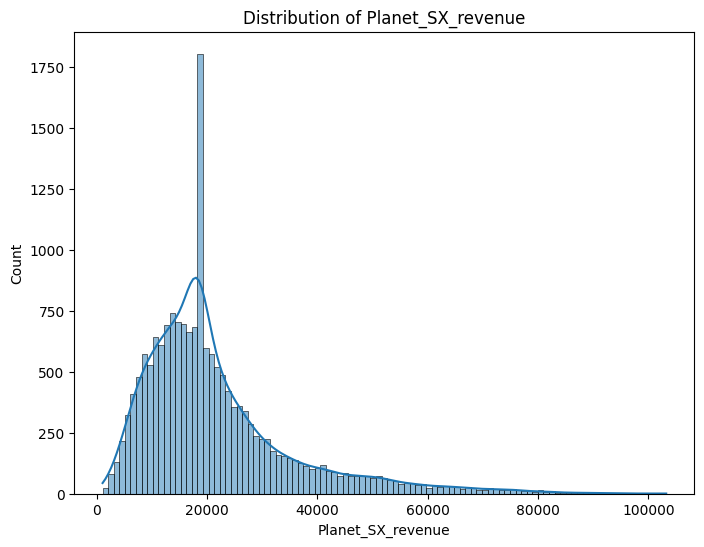

In [76]:
# Distributions des reveunes
for col in revenue_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Commentaire des résultats
Les trois modèles présentent des caractéristiques de distribution similaires :
1. Asymétrie positive (skewness) : la queue de distribution s'étend vers la droite
2. Distribution unimodale avec un pic distinct
3. Queue longue vers les valeurs élevées

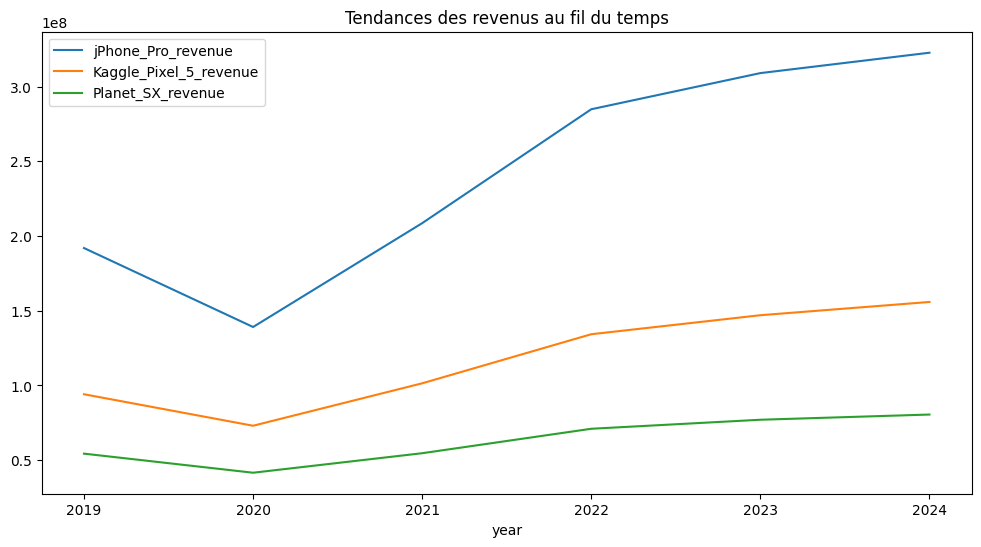

In [77]:
# Tendances temporelles des revenus
data.groupby('year')[revenue_cols].sum().plot(figsize=(12, 6), title="Tendances des revenus au fil du temps")
plt.show()

### L'impact des variables sur les revenus

In [78]:
for col in data.columns:
    if col not in revenue_cols:
         if(data[col].dtypes != 'object'):
          corr = data[revenue_cols].corrwith(data[col])
          print(f"Correlation of {col} with revenue:\n {corr}")
         else:
            print(f"Column '{col}' is not numerical, can't calculate correlation")

Column 'date' is not numerical, can't calculate correlation
Correlation of marketing_score with revenue:
 jPhone_Pro_revenue        0.773097
Kaggle_Pixel_5_revenue    0.774125
Planet_SX_revenue         0.764039
dtype: float64
Correlation of competition_index with revenue:
 jPhone_Pro_revenue        0.649264
Kaggle_Pixel_5_revenue    0.689675
Planet_SX_revenue         0.707746
dtype: float64
Correlation of customer_satisfaction with revenue:
 jPhone_Pro_revenue        0.668902
Kaggle_Pixel_5_revenue    0.694664
Planet_SX_revenue         0.693969
dtype: float64
Correlation of purchasing_power_index with revenue:
 jPhone_Pro_revenue        0.668229
Kaggle_Pixel_5_revenue    0.703974
Planet_SX_revenue         0.726974
dtype: float64
Correlation of weather_condition with revenue:
 jPhone_Pro_revenue        0.016608
Kaggle_Pixel_5_revenue    0.026559
Planet_SX_revenue         0.025185
dtype: float64
Correlation of store_traffic with revenue:
 jPhone_Pro_revenue        0.236185
Kaggle_Pixel_5

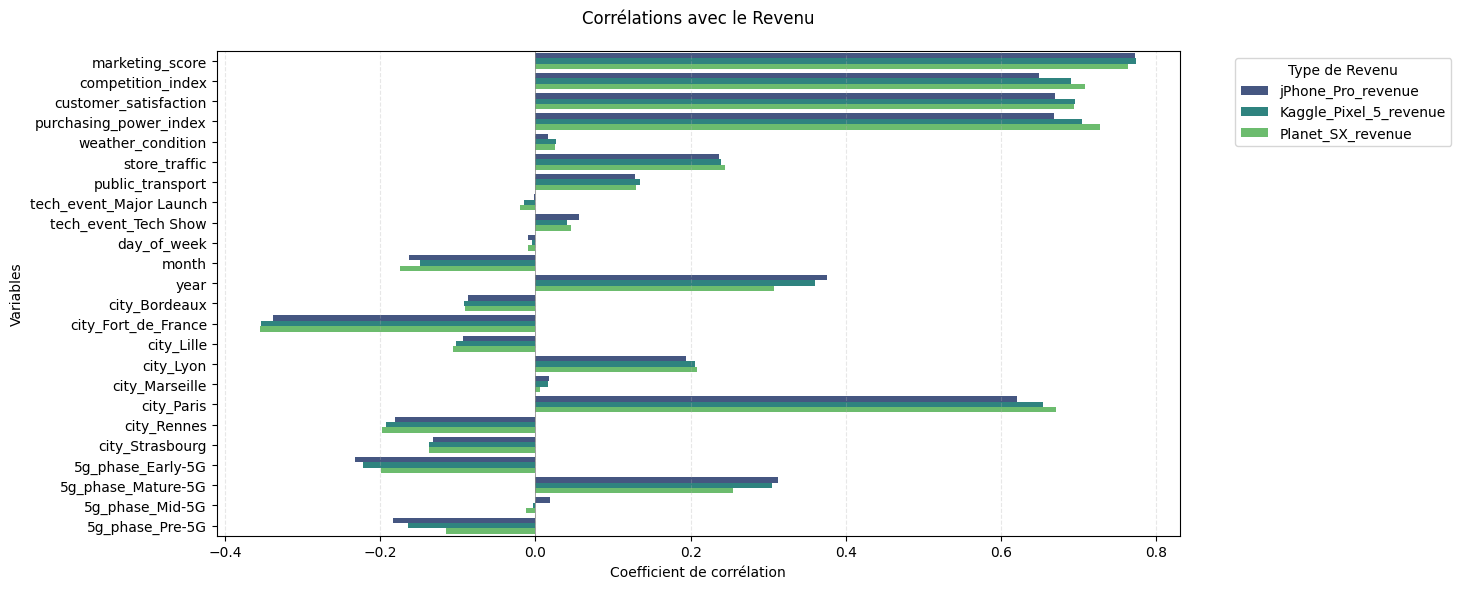

In [79]:
def plot_revenue_correlations(df, revenue_cols):
    # Filtrer les colonnes numériques
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    numeric_cols = [col for col in numeric_cols if col not in revenue_cols]
    
    # Calculer les corrélations
    correlations = []
    for col in numeric_cols:
        corr_values = df[revenue_cols].corrwith(df[col])
        for rev_col, corr in corr_values.items():
            correlations.append({
                'Variable': col,
                'Revenue_Type': rev_col,
                'Correlation': corr
            })
    
    # Créer un DataFrame des corrélations
    corr_df = pd.DataFrame(correlations)
    
    # Créer la visualisation
    plt.figure(figsize=(12, 6))
    
    # Créer un bar plot avec seaborn
    sns.barplot(
        data=corr_df,
        y='Variable',
        x='Correlation',
        hue='Revenue_Type',
        palette='viridis'
    )
    
    # Personnaliser le graphique
    plt.title('Corrélations avec le Revenu', pad=20)
    plt.xlabel('Coefficient de corrélation')
    plt.ylabel('Variables')
    
    # Ajouter une ligne verticale à 0
    plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
    
    # Ajouter une grille pour faciliter la lecture
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    
    # Ajuster les marges
    plt.tight_layout()
    
    # Ajouter une légende
    plt.legend(title='Type de Revenu', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    return plt

# Exemple d'utilisation:
plot_revenue_correlations(data, revenue_cols)
plt.show()

### Les spécificités locales qui influencent les ventes

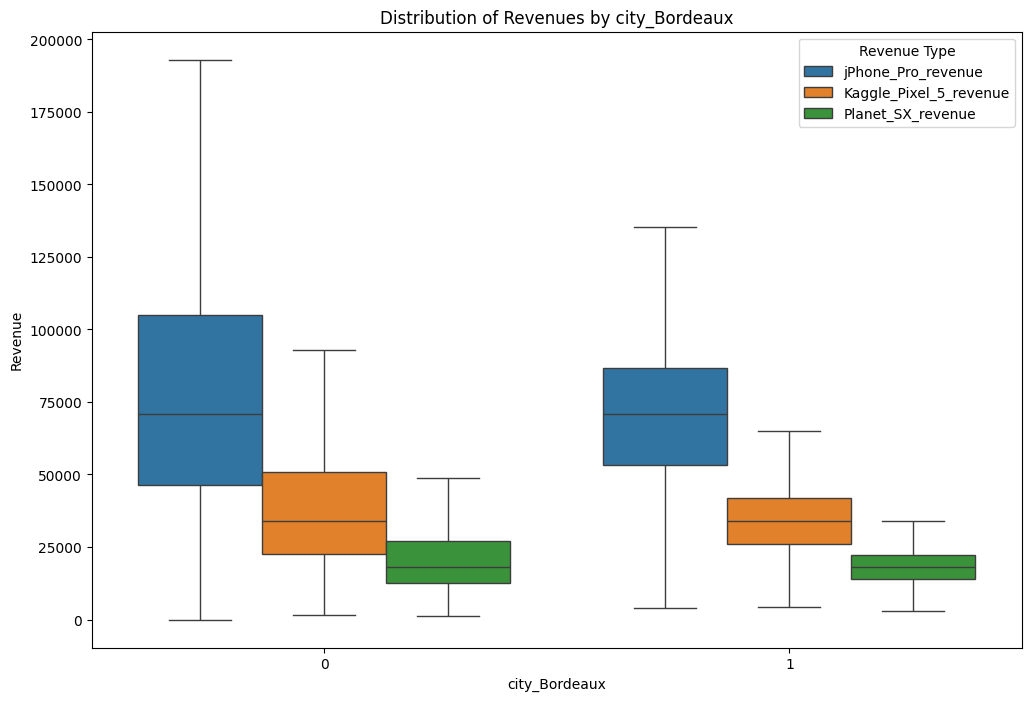

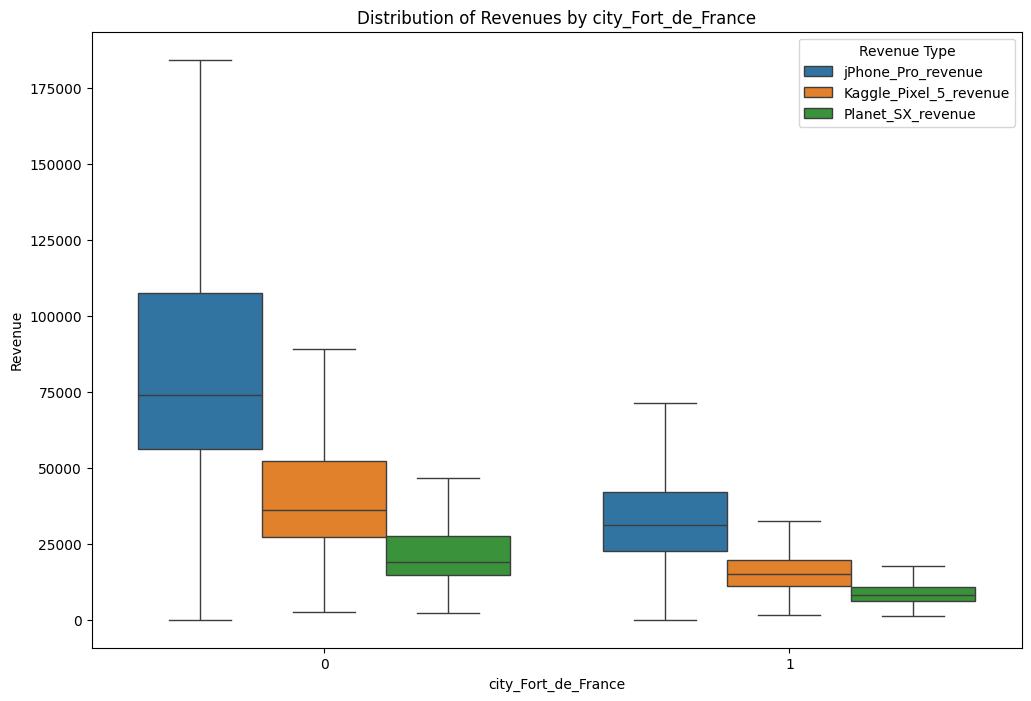

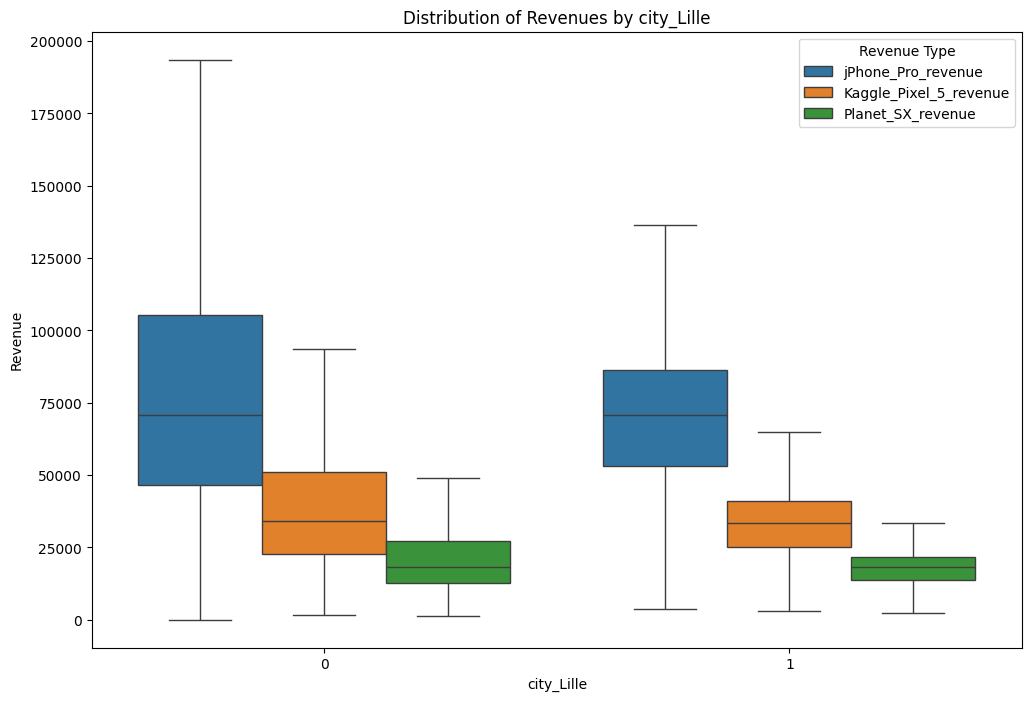

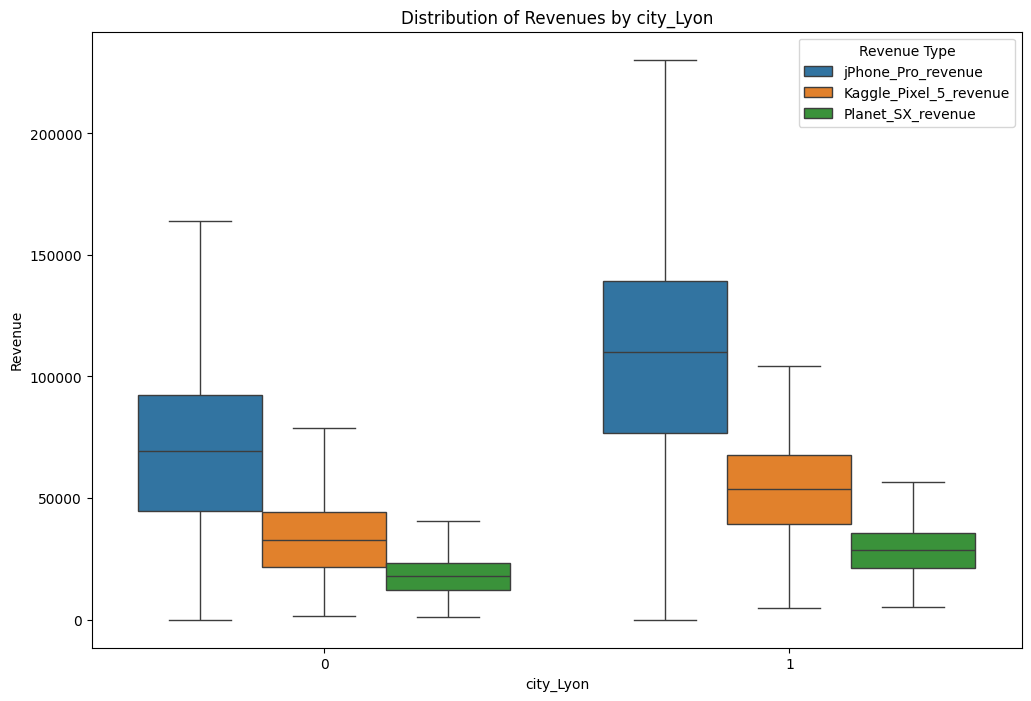

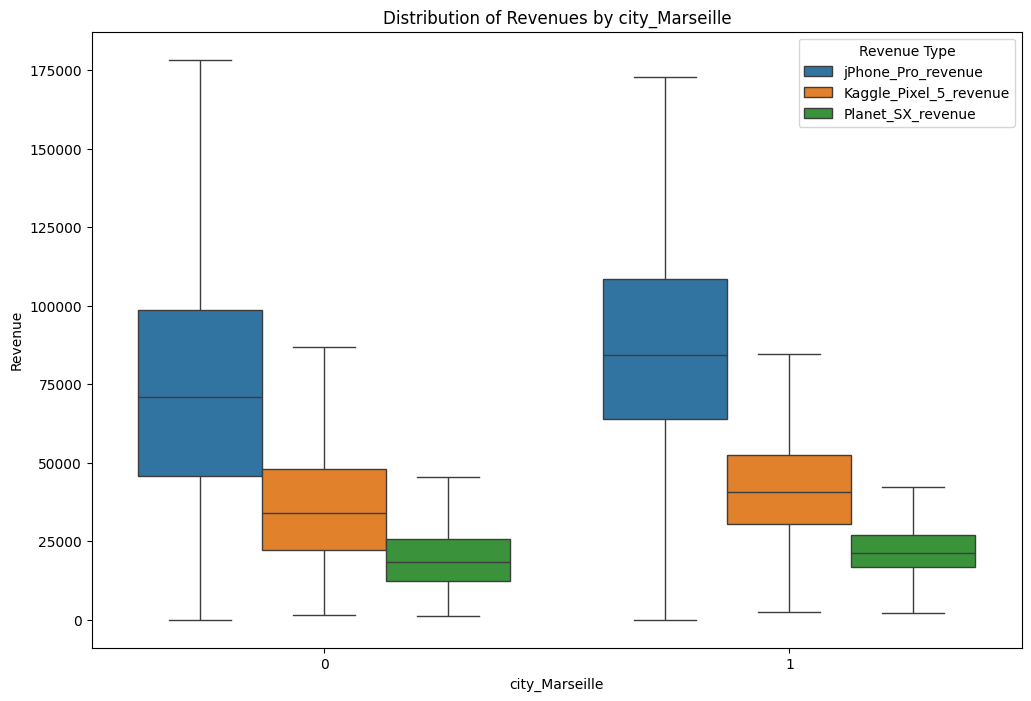

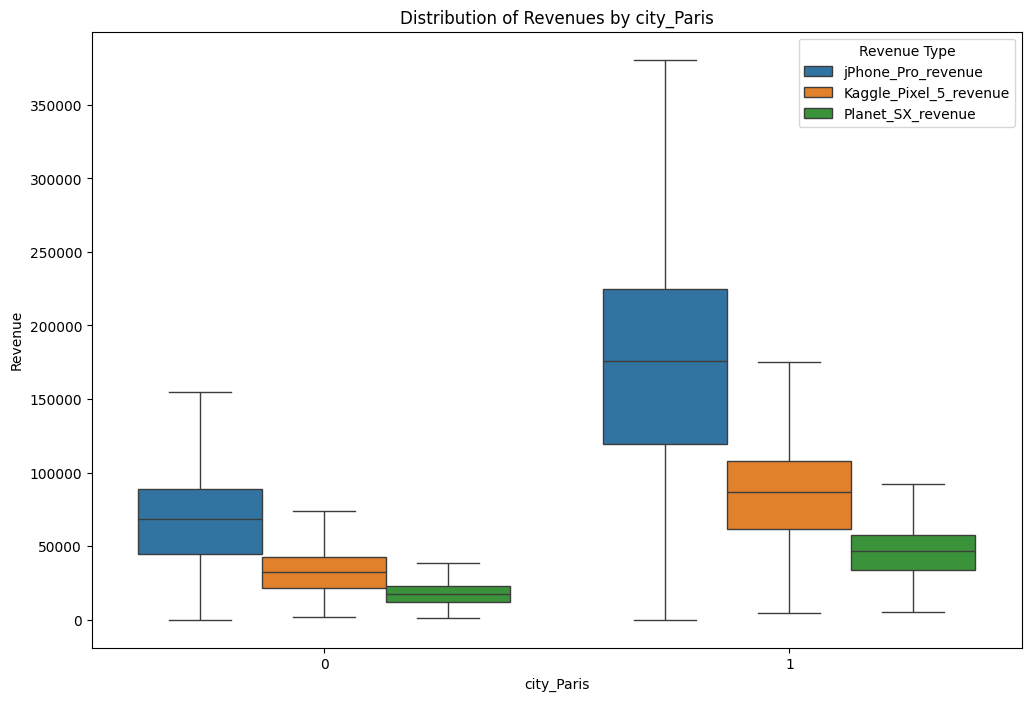

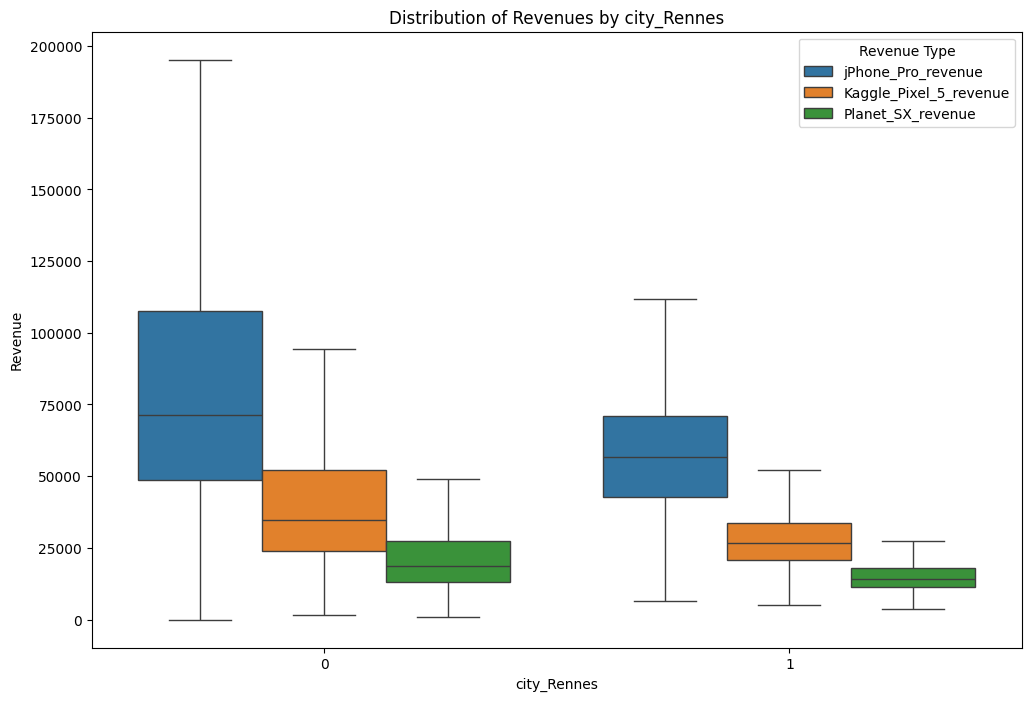

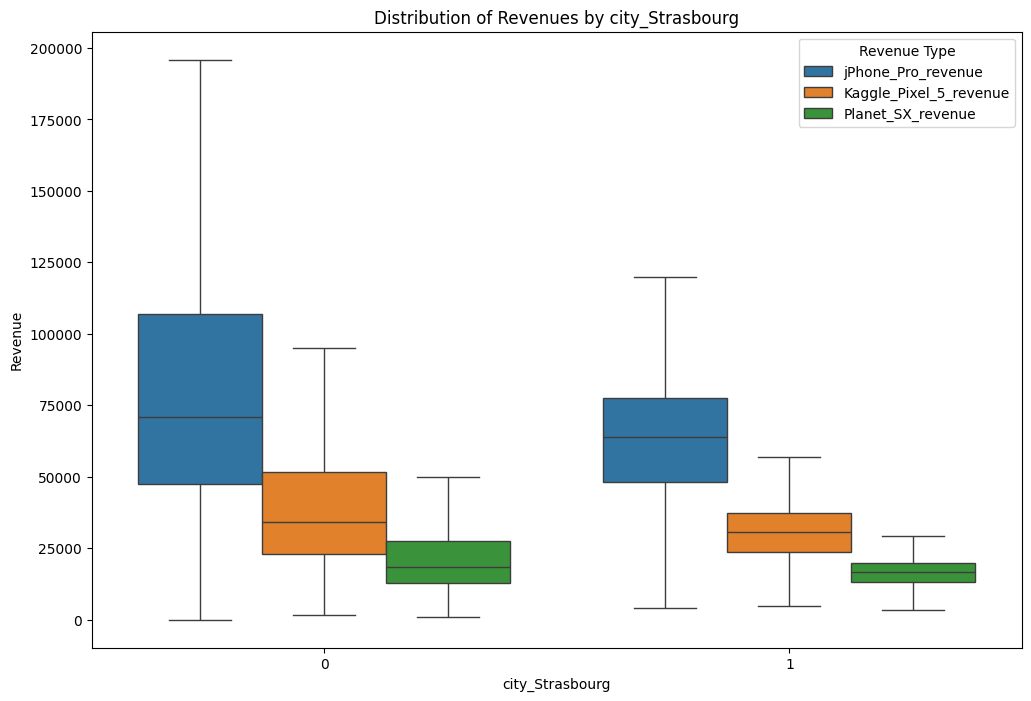

In [80]:
city_cols = [col for col in data.columns if "city_" in col]
city_revenue = data[city_cols+revenue_cols].groupby(city_cols).sum()

for city in city_cols:
    plt.figure(figsize=(12, 8))
    data_melted = data.melt(id_vars=[city], value_vars=revenue_cols, 
                            var_name='Revenue Type', value_name='Value')
    
    sns.boxplot(x=city, y='Value', hue='Revenue Type', data=data_melted, showfliers=False)
    plt.title(f"Distribution of Revenues by {city}")
    plt.ylabel("Revenue")
    plt.xlabel(city)
    plt.legend(title="Revenue Type", loc="upper right")
    plt.show()